In [5]:
import pandas as pd
from sklearn import preprocessing
import plotly
import plotly.express as px

In [31]:
df = pd.read_csv('data/segmented_customers.csv')
df.head()

,customer_id,gender,age,annual_income,spending_score,cluster
0,1,1,19.0,15.0,39.0,3
1,2,1,21.0,15.0,81.0,4
2,3,0,20.0,16.0,6.0,3
3,4,0,23.0,16.0,77.0,4
4,5,0,31.0,17.0,40.0,3


In [9]:
df[df.isna().any(axis=1)]

,customer_id,gender,age,annual_income,spending_score


In [10]:
fig = px.scatter_3d(
    data_frame=df,
    x='age',
    y='annual_income',
    z='spending_score',
    width=1000,
    height=700
)
fig.show()

In [7]:
def get_3d_visualization(df, clust_result):
    fig = px.scatter_3d(
        data_frame=df,
        x='age',
        y='annual_income',
        z='spending_score',
        width=1000,
        height=700,
        color=clust_result
    )
    return fig

In [11]:
X = df[['age', 'annual_income', 'spending_score']]

In [12]:
from sklearn.cluster import DBSCAN

In [13]:
dbscan = DBSCAN()

res = dbscan.fit_predict(X)

df['res'] = res

get_3d_visualization(df, 'res')

In [20]:
dbscan = DBSCAN(eps=12)

res = dbscan.fit_predict(X)
df['res'] = res

get_3d_visualization(df, 'res')

In [21]:
from sklearn.cluster import AgglomerativeClustering

In [22]:
def get_aggl_clustering(X, n_clusters):
    agg_cl = AgglomerativeClustering(
        n_clusters=n_clusters,
        linkage='ward'
    )
    agg_cl.fit(X)
    pred = agg_cl.labels_
    
    return pred

In [23]:
res = get_aggl_clustering(X, 3)

In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

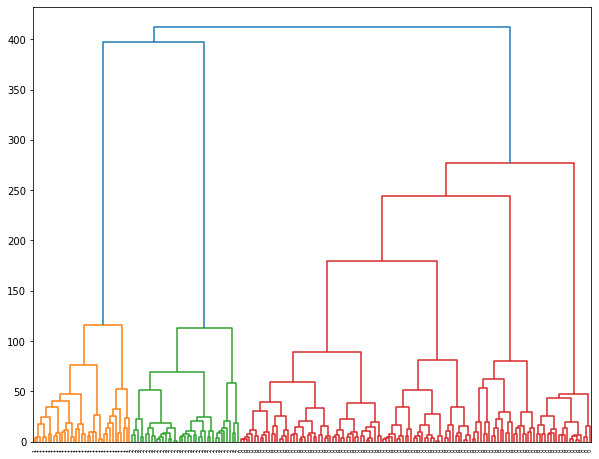

In [27]:
linked = linkage(X, 'ward')
plt.figure(figsize=(10, 8))

dendrogram(
    Z=linked,
    orientation='top',
    labels=res,
    distance_sort='descending'
)

plt.show()

In [28]:
res = get_aggl_clustering(X, 6)
df['res'] = res
get_3d_visualization(df, 'res')

In [29]:
from sklearn.metrics import silhouette_score
import seaborn as sns

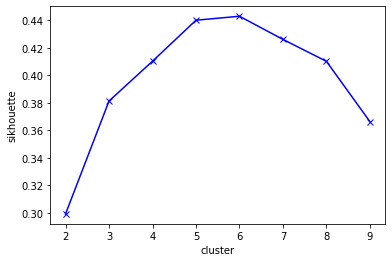

In [30]:
sil = []
for i in range(2, 10):
    res = get_aggl_clustering(X, i)
    sil.append(silhouette_score(X, res))
    
plt.xlabel('cluster')
plt.ylabel('sikhouette')
plt.plot([i for i in range(2, 10)], sil, 'xb-')

In [32]:
from sklearn.metrics.cluster import completeness_score

In [33]:
print(completeness_score(df.cluster, get_aggl_clustering(X, 6)))

0.9858363091910892
